# Multimodal RAG

## Overview

This notebook demonstrates how to build a Multimodal RAG (Retrieval-Augmented Generation) system using LangChain. The system processes both text and images from documents, creating a unified knowledge base for question-answering.

Key features include:
- Text content extraction to markdown using `pymupdf4llm`
- Image content extraction using `Upstage Document AI API`
- Text and image content merging by page
- RAG implementation using `OpenAI embeddings` and `GPT-4o`
- `Langgraph` based RAG pipeline

![Multimodal RAG Architecture]
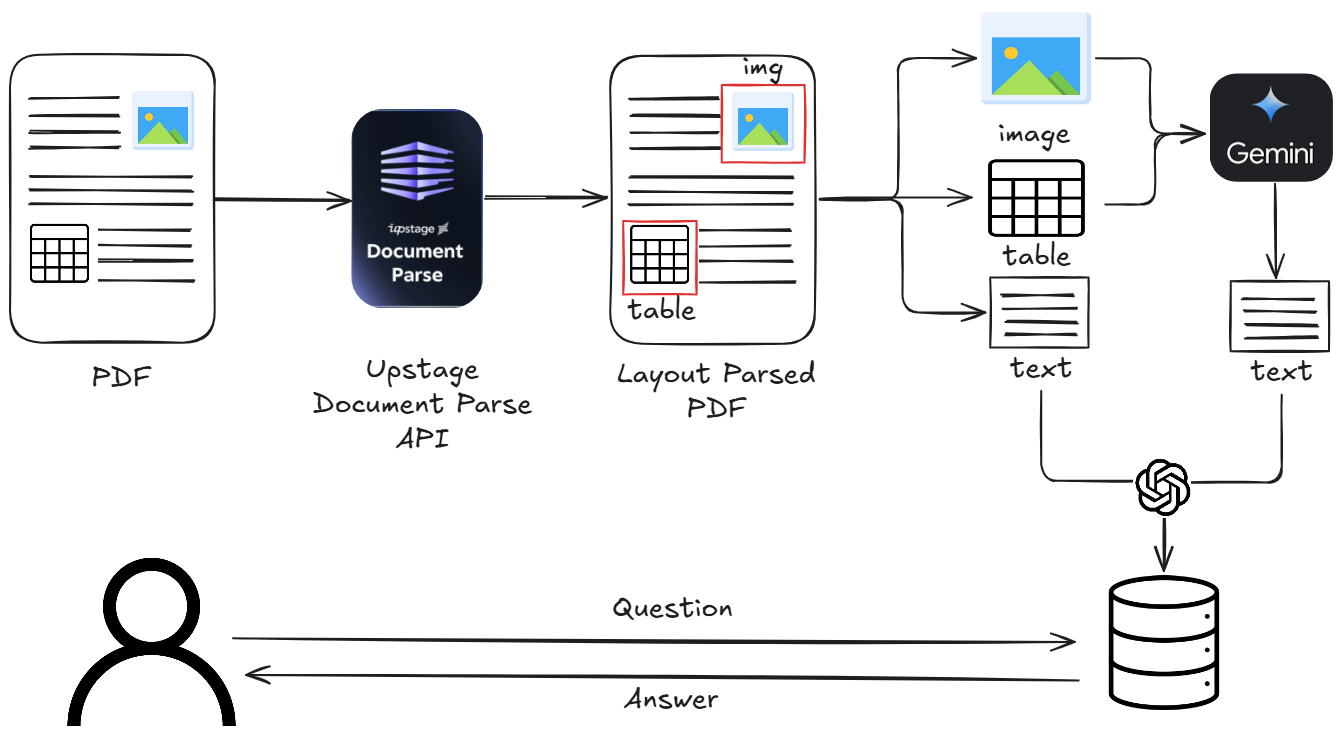

### Table of Contents

- [Overview](#overview)
- [Environment Setup](#environment_setup)
- [Extract and preprocess Text contents from PDF using PyMuPDF4LLM](#extract-and-preprocess-text-contents-from-pdf-using-pymupdf4llm)
- [Layout parsing to extract image from PDF using Upstage Document Parse API](#layout-parsing-to-extract-image-from-pdf-using-upstage-document-parse-api)
- [Building a RAG Pipeline with LangGraph](#building-a-rag-pipeline-with-langgraph)

### References

- [PyMuPDF4LLM](https://pymupdf.readthedocs.io/en/latest/pymupdf4llm/api.html#pymupdf4llm-api)
- [Upstage Document AI](https://www.upstage.ai/blog/en/let-llms-read-your-documents-with-speed-and-accuracy)
- [Gemini in Langchain](https://python.langchain.com/docs/integrations/chat/google_generative_ai/)
- [Multimodal input in Langchain](https://python.langchain.com/docs/how_to/multimodal_inputs/)
---

## Environment Setup

Set up the environment. You may refer to [Environment Setup](https://wikidocs.net/257836) for more details.

**[Note]**
- `langchain-opentutorial` is a package that provides a set of easy-to-use environment setup, useful functions and utilities for tutorials. 
- You can checkout the [`langchain-opentutorial`](https://github.com/LangChain-OpenTutorial/langchain-opentutorial-pypi) for more details.

In [6]:
# %%capture --no-stderr
# %pip install langchain-opentutorial

In [7]:
# Install required packages
from langchain_opentutorial import package

package.install(
    [
        "pymupdf4llm",
        "langchain-upstage",
        "langchain-google-genai",
        "langchain-chroma",
        "langchain-openai",       
    ],
    verbose=False,
    upgrade=False,
)

In [8]:
import os
from dotenv import load_dotenv
load_dotenv() 

True

## Extract and preprocess Text contents from PDF using `PyMuPDF4LLM`
### `PyMuPDF4LLM`

`PyMuPDF4LLM` is a Python package designed to facilitate the extraction of PDF content into formats suitable for Large Language Models (LLMs) and Retrieval-Augmented Generation (RAG) environments. It supports Markdown extraction and LlamaIndex document output, making it a valuable tool for developing document-based AI applications.

### Key Features

- **Multi-Column Page Support**: Accurately extracts text from pages with multiple columns.

- **Image and Vector Graphics Extraction**: Extracts images and vector graphics from pages, including references in the Markdown text.

- **Page Chunking Output**: Outputs pages in chunks, facilitating use in LLM and RAG systems.

- **LlamaIndex Document Output**: Directly converts PDFs into LlamaIndex document format.

In [9]:
# # Install PyMuPDF4LLM using pip:
# %pip install pymupdf4llm

In [10]:
file_path = "../Data/PDFs/peksevim_rf_brief_2025_online.pdf"

In [12]:
import pymupdf4llm

# to_markdown() function extracts text content and converts it into markdown format
md_text = pymupdf4llm.to_markdown(
    doc=file_path,  # The file, either as a file path or a PyMuPDF Document.
    page_chunks=True,  # If True, output is a list of page-specific dictionaries.
    show_progress=True,  # Displays a progress bar during processing.
    # pages=[0, 1, 2],  - Optional, specify 0-based page numbers to process.
    # hdr_info=False,  - Optional, disables header detection logic.
    # write_images=True,  #- Saves images found in the document as files.
    # embed_images=True,  - Embeds images directly as base64 in markdown.
    # image_size_limit=0.05,  - Exclude small images below this size threshold.
    # dpi=150,  - Image resolution in dots per inch, if write_images=True.
    # image_path="output_images",  - Directory to save images if write_images=True.
    # image_format="png",  - Image file format, e.g., "png" or "jpg".
    # force_text=True,  - Include text overlapping images/graphics.
    # margins=0,  - Specify page margins for text extraction.
    # page_width=612,  - Desired page width for reflowable documents.
    # page_height=None,  - Desired page height for reflowable documents.
    # table_strategy="lines_strict",  #- Strategy for table detection.
    # graphics_limit=5000,  - Limit the number of vector graphics processed.
    # ignore_code=False,  - If True, avoids special formatting for mono-spaced text.
    # extract_words=False,  - Adds word-level data to each page dictionary.
)

Processing ../Data/PDFs/peksevim_rf_brief_2025_online.pdf...
[                                        ] (0/3[=                                       ] ( 1/3[==                                      ] ( 2/38[===                                     ] ( 3/3[====                                    ] ( 4/38[=====                                   ] ( 5/3[======                                  ] ( 6/38[=======                                 ] ( 7/3[========                                ] ( 8/38[=========                               ] ( 9/3[==========                              ] (10/38[===========                             ] (11/3[============                            ] (12/38[=============                           ] (13/3[==============                          ] (14/38[===============                         ] (15/3[================                        ] (16/38[=================                       ] (17/3[==================                      ] (18/38[==================

In [13]:
print(md_text[1]['text'])

-----




In [14]:
for page, text in enumerate(md_text[:15]):
    print(f"📄 **Page {page+1}**\n{'='*20}")
    print(f"{text['text'][:100]}...")

📄 **Page 1**
##### CFA INSTITUTE RESEARCH FOUNDATION / BRIEF
# **OPTIMAL DESIGN OF ** **LIFE-CYCLE FUNDS IN ** **...
📄 **Page 2**
-----

...
📄 **Page 3**
## **OPTIMAL DESIGN OF 
** **LIFE-CYCLE FUNDS IN ** **EMERGING MARKET ** **COUNTRIES**

**SEDA PEKSE...
📄 **Page 4**
#### Statement of Purpose

The CFA Institute Research Foundation is a not-for-profit organization es...
📄 **Page 5**
Optimal Design of Life-Cycle Funds in Emerging Market Countries
### **CONTENTS**

**1.** **Introduct...
📄 **Page 6**
-----

...
📄 **Page 7**
Optimal Design of Life-Cycle Funds in Emerging Market Countries
### **OPTIMAL DESIGN OF LIFE-CYCLE *...
📄 **Page 8**
Optimal Design of Life-Cycle Funds in Emerging Market Countries

human capital and stock returns. Fi...
📄 **Page 9**
Optimal Design of Life-Cycle Funds in Emerging Market Countries

A growing number of studies have ch...
📄 **Page 10**
Optimal Design of Life-Cycle Funds in Emerging Market Countries
#### **3. Data**

Our study uses two...
📄 **Page 11**
O

## Layout parsing to extract image from PDF using `Upstage Document Parse API`

The `Upstage Document Parse API` is a robust AI model that converts various document formats, including PDFs and images, into HTML by detecting layout elements such as paragraphs, tables, and images. This facilitates the integration of document content into applications requiring structured data.

**Key Features:**

- **Layout Detection:** Identifies and preserves document structures, including paragraphs, tables, and images.

- **Format Conversion:** Transforms documents into HTML, maintaining the original layout and reading order.

- **High Performance:** Processes documents swiftly, handling up to 100 pages per minute.
  
<img src="https://cdn.prod.website-files.com/6743d5190bb2b52f38e99ecd/674803bdd33f606f35b972bf_Upstage_DP_KV.png" alt="image" width="700">

Source: [Upstage Official Website](https://www.upstage.ai/blog/en/let-llms-read-your-documents-with-speed-and-accuracy)


### `UpstageDocumentParseLoader` in LangChain
The `UpstageDocumentParseLoader` is a component of the langchain_upstage package that integrates `Upstage's Document Parser API` into the LangChain framework. It enables seamless loading and parsing of documents within LangChain applications. 


In [15]:
# Install the langchain-upstage package using pip:
#%pip install -U langchain-upstage

In [16]:
from langchain_upstage import UpstageDocumentParseLoader

loader = UpstageDocumentParseLoader(
            file_path, split="page", 
            output_format="markdown",
            base64_encoding=["figure", "chart", "table"]
         )
docs = loader.load_and_split()

In [11]:
len(docs)

35

Inspect parsed documents to check for and display base64-encoded content along with a brief summary of each document's content and metadata.


In [12]:
for i, j in enumerate(docs[:14]):
    bs_encoding = j.metadata['base64_encodings']

    if len(bs_encoding) > 0:
        print(f"📄 **Page {i+1}**\n{'='*20}")
        print(f"📝 **Page Content Preview:** {j.page_content[:100]}...")
        print(f"🔑 **Metadata Keys:** {', '.join(j.metadata.keys())}")
        print(f"🖼️ **Base64 Encoding (Preview):** {bs_encoding[0][:10]}...")
        print("\n")

📄 **Page 9**
📝 **Page Content Preview:** Optimal Design of Life-Cycle Funds in Emerging Market Countries # 3. Data Our study uses two differe...
🔑 **Metadata Keys:** page, base64_encodings, coordinates
🖼️ **Base64 Encoding (Preview):** /9j/2wCEAA...


📄 **Page 10**
📝 **Page Content Preview:** Optimal Design of Life-Cycle Funds in Emerging Market Countries # Exhibit 2. Capital Market Assumpti...
🔑 **Metadata Keys:** page, base64_encodings, coordinates
🖼️ **Base64 Encoding (Preview):** /9j/2wCEAA...


📄 **Page 13**
📝 **Page Content Preview:** Optimal Design of Life-Cycle Funds in Emerging Market Countries # 5. Results # Stochastic Human Capi...
🔑 **Metadata Keys:** page, base64_encodings, coordinates
🖼️ **Base64 Encoding (Preview):** /9j/2wCEAA...


📄 **Page 14**
📝 **Page Content Preview:** Optimal Design of Life-Cycle Funds in Emerging Market Countries # Exhibit 4. Human Capital Distribut...
🔑 **Metadata Keys:** page, base64_encodings, coordinates
🖼️ **Base64 Encoding (Preview):** /9j/2

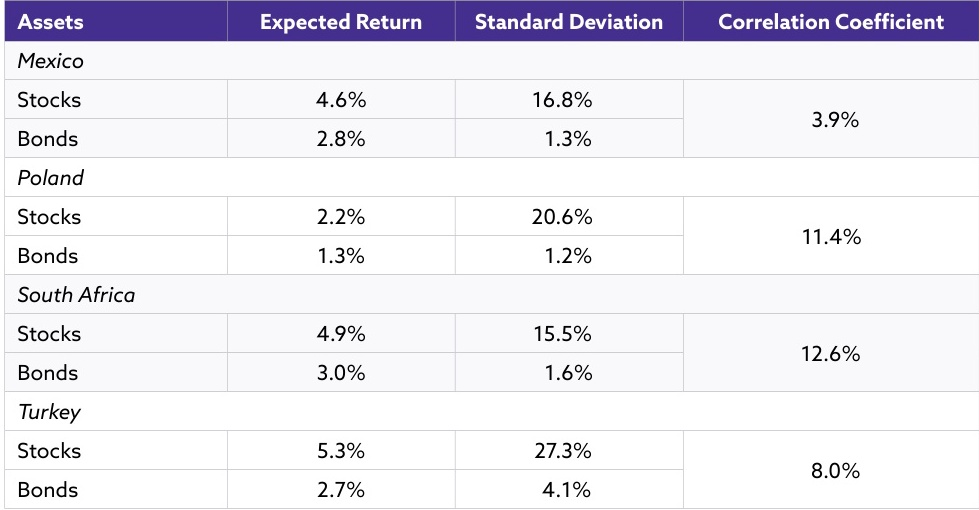

In [17]:
import base64
from IPython.display import Image, display

img_data = base64.b64decode(docs[9].metadata['base64_encodings'][0])  # Decode base64
display(Image(data=img_data))  # Display the image

This process generates multimodal descriptions of images detected on each page using the `Gemini 1.5 Flash 8B API`. These descriptions are combined with the previously extracted text to create a complete embedding, enabling a RAG pipeline capable of understanding images as well.

In [28]:
from langchain_core.documents import Document
from google.generativeai import configure, GenerativeModel
import base64
import os

configure()

def create_image_descriptions(docs):
    model = GenerativeModel("gemini-2.5-pro-preview-03-25")
    new_documents = []
    
    for doc in docs:
        if 'base64_encodings' in doc.metadata:
            for img_base64 in doc.metadata['base64_encodings']:
                try:
                    # Build the content package correctly
                    response = model.generate_content(
                        contents=[
                            {
                                "parts": [
                                    """
                                    Describe in exhaustive detail all factual content visible in the image.

                                    Instructions:

                                    1. If the image is decorative or non-informational, output only: <---image--->

                                    2. For content images, follow these rules:

                                    - General Images:
                                        - List every visible object, person, or entity, including their positions, colors, sizes, and spatial relationships.
                                        - Describe all actions, interactions, and the full context (foreground, background, setting, environment).
                                        - Transcribe all visible text, labels, or signage exactly as shown, using quotation marks.
                                        - Include any numbers, dates, or identifiers present.

                                    - Charts, Graphs, and Infographics:
                                        - State the chart/graph type (e.g., bar chart, line graph, scatter plot, pie chart).
                                        - List every axis label, unit, and scale, including axis ranges and tick values.
                                        - For each data series, describe its color/style and all data points with their exact values and labels.
                                        - Transcribe all legends, annotations, captions, and footnotes.
                                        - Describe any patterns, groupings, or outliers strictly as visible (do not interpret).

                                    - Tables:
                                        - Convert the entire table into markdown table format, preserving the exact row and column order, headers, and all cell values.
                                        - Include footnotes or superscripts if present.

                                    General Rules:
                                    - Include only what is directly observable-do not interpret, summarize, or omit details.
                                    - Use original numbers, text, and labels without modification.
                                    - Be as complete and specific as possible, even if the description is long.
                                    - For complex images, break down the description into logical sections (e.g., "Title," "Legend," "X-axis," "Data Points," etc.).
                                    """,
                                    {
                                        "mime_type": "image/png",
                                        "data": base64.b64decode(img_base64)
                                    }
                                ]
                            }
                        ]
                    )
                    
                    # Extract text safely
                    if response.candidates:
                        description = response.candidates[0].content.parts[0].text
                    else:
                        description = "<---image--->"
                        
                except Exception as e:
                    print(f"Error processing image: {str(e)}")
                    description = "<---image--->"
                
                new_documents.append(
                    Document(
                        page_content=description,
                        metadata={"page": doc.metadata.get("page", "unknown")}
                    )
                )
    
    return new_documents

# Generate image descriptions
image_description_docs = create_image_descriptions(docs)


In [31]:
# Check the results
for doc in image_description_docs[:3]:
    print(f"📄 **Page {doc.metadata['page']}**\n{'='*20}")
    print(f"Description: {doc.page_content}")
    print("---")

📄 **Page 10**
Description: *   **Chart Type:** Line graph.
*   **Y-axis:**
    *   Label: "Annual Real Earnings (15-24=100)"
    *   Scale: Ranges from 0 to 200.
    *   Tick marks: Labeled at 0, 50, 100, 150, 200.
*   **X-axis:**
    *   Label: "Age Group (years)"
    *   Categories: "15-24", "25-34", "35-44", "45-54", "55-64".
*   **Legend:** Located below the x-axis.
    *   A dark blue solid line segment with a dark blue square marker is labeled "Mexico".
    *   A light blue dotted line segment with a light blue square marker is labeled "Poland".
    *   A cyan dashed line segment with a cyan square marker is labeled "South Africa".
    *   An orange long-dashed line segment with an orange square marker is labeled "Turkey".
*   **Data Series and Points:**
    *   **Mexico (Dark Blue Solid Line with Dark Blue Square Markers):**
        *   Age Group 15-24: Value approximately 100.
        *   Age Group 25-34: Value approximately 155.
        *   Age Group 35-44: Value approximately

In [32]:
from langchain_core.documents import Document
from collections import defaultdict

def merge_text_and_images(md_text, image_description_docs):
    # Create a dictionary to collect data by page
    page_contents = defaultdict(list)
    page_metadata = {}
    
    # Process md_text
    for text_item in md_text:
        # Standardize page numbers to integer
        page = int(text_item['metadata']['page'])
        page_contents[page].append(text_item['text'])
        # Save metadata for each page
        if page not in page_metadata:
            page_metadata[page] = {
                'source': text_item['metadata']['file_path'],
                'page': page
            }
    
    # Process image_description_docs
    for img_doc in image_description_docs:
        # Standardize page numbers to integer
        page = int(img_doc.metadata['page'])
        page_contents[page].append(img_doc.page_content)
    
    # Create the final list of Document objects
    merged_docs = []
    for page in sorted(page_contents.keys()):
        # Combine all content of the page into a single string
        full_content = '\n\n'.join(page_contents[page])
        
        # Create a Document object
        doc = Document(
            page_content=full_content,
            metadata=page_metadata[page]
        )
        merged_docs.append(doc)
    
    return merged_docs

In [33]:
merged_documents = merge_text_and_images(md_text, image_description_docs)

In [57]:
print(merged_documents[10].page_content)

Optimal Design of Life-Cycle Funds in Emerging Market Countries
###### Exhibit 2. Capital Market Assumptions by Country, 2004–2022

|Assets|Expected Return|Standard Deviation|Correlation Coefficient|
|---|---|---|---|
|Mexico||||
|Stocks|4.6%|16.8%|3.9%|
|Bonds|2.8%|1.3%||
|Poland||||
|Stocks|2.2%|20.6%|11.4%|
|Bonds|1.3%|1.2%||
|South Africa||||
|Stocks|4.9%|15.5%|12.6%|
|Bonds|3.0%|1.6%||
|Turkey||||
|Stocks|5.3%|27.3%|8.0%|
|Bonds|2.7%|4.1%||



*Source:* Thomson Reuters Database.

The second dataset in this study contains real-return capital market assumptions for stocks
and bonds. **Exhibit 2** presents the annual expected return, standard deviation, and correla-­
tion coefficient assumptions for Mexico, Poland, South Africa, and Turkey, respectively. The
expected returns for equities and bonds are based on historical real return averages, calculated
using monthly data from the Thomson Reuters Database for the period 2004–2022. We chose
this time period because of data availabilit

## Building a RAG Pipeline with `LangGraph`

This guide demonstrates how to use `LangGraph` to build a unified RAG (Retrieval-Augmented Generation) application. By combining retrieval and generation into a single flow, `LangGraph` offers streamlined execution, deployment, and additional features like persistence and human-in-the-loop approval.

### Key Components

1. **Application State**:
   - Tracks input (`question`), intermediate (`context`), and output (`answer`) data using a `TypedDict`.

2. **Application Steps**:
   - **Retrieve**: Uses `Chroma` for similarity-based document retrieval.
   - **Generate**: Formats retrieved context and question, then invokes `ChatOpenAI` to generate an answer.

3. **Control Flow**:
   - Uses `StateGraph` to define the sequence and connections between steps.

In [36]:
import os
from dotenv import load_dotenv
from langchain_text_splitters import RecursiveCharacterTextSplitter  
from langchain_openai import OpenAIEmbeddings                     
from langchain.vectorstores import Pinecone as LangPinecone   
import pinecone
from pinecone import Pinecone as PineconeClient, ServerlessSpec

load_dotenv() 
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

pc = PineconeClient(
    api_key=os.getenv("PINECONE_API_KEY"),
    environment=os.getenv("PINECONE_ENVIRONMENT")
)                                         
index_name = "cma-docs-2004-2022"
if index_name not in pc.list_indexes().names():  
    pc.create_index(
        name=index_name,
        dimension=1536,                      
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1")
    )

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200
)                                           
all_splits = text_splitter.split_documents(merged_documents)

vector_store = LangPinecone.from_documents(
    documents=all_splits,
    embedding=embeddings,
    index_name=index_name      
)                                      

In [58]:
# 6) Perform similarity search, asking for the top 10 results
retrieved_docs = vector_store.similarity_search(
    "Capital Market Assumptions by Country, 2004–2022",
    k=10
)

# 7) Print out the top-10 matches
for i, doc in enumerate(retrieved_docs, start=1):
    print(f"--- Result #{i} ---")
    print(doc.page_content[:1000].strip())     # show the first 300 characters
    print("…")
    print("Metadata:", doc.metadata)
    print()

--- Result #1 ---
Optimal Design of Life-Cycle Funds in Emerging Market Countries
###### Exhibit 2. Capital Market Assumptions by Country, 2004–2022

|Assets|Expected Return|Standard Deviation|Correlation Coefficient|
|---|---|---|---|
|Mexico||||
|Stocks|4.6%|16.8%|3.9%|
|Bonds|2.8%|1.3%||
|Poland||||
|Stocks|2.2%|20.6%|11.4%|
|Bonds|1.3%|1.2%||
|South Africa||||
|Stocks|4.9%|15.5%|12.6%|
|Bonds|3.0%|1.6%||
|Turkey||||
|Stocks|5.3%|27.3%|8.0%|
|Bonds|2.7%|4.1%||



*Source:* Thomson Reuters Database.
…
Metadata: {'page': 11.0, 'source': '../Data/PDFs/peksevim_rf_brief_2025_online.pdf'}

--- Result #2 ---
The second dataset in this study contains real-return capital market assumptions for stocks
and bonds. **Exhibit 2** presents the annual expected return, standard deviation, and correla-­
tion coefficient assumptions for Mexico, Poland, South Africa, and Turkey, respectively. The
expected returns for equities and bonds are based on historical real return averages, calculated
using mon

In [61]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.documents import Document
from langchain_openai import ChatOpenAI
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict

llm = ChatOpenAI(model="gpt-4o-mini")

prompt = ChatPromptTemplate([
    ("human", """
You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the question. 
If you don't know the answer, just say that you don't know. 
Question: {question} 
Context: {context} 
Answer:
""")])

class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

def retrieve(state: State):
    print(f"SEARCHING DOCUMENTS...\n{'='*20}")
    retrieved = vector_store.similarity_search(state["question"])
    print(f"Top hit preview:\n{retrieved[0].page_content[:100]}\n{'='*20}")
    return {"context": retrieved}

def generate(state: State):
    print(f"GENERATING ANSWER...\n{'='*20}")
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

response = graph.invoke({"question": "Which country offers the highest expected return for stocks, and how does this compare to its associated risk as measured by standard deviation"})
print(response["answer"])

SEARCHING DOCUMENTS...
Top hit preview:
*   **Data Rows:**
    *   **Mexico:** Stocks have an Expected Return of 4.6% and a Standard Deviati
GENERATING ANSWER...
Turkey offers the highest expected return for stocks at 5.3%, but it also has the highest associated risk as measured by standard deviation at 27.3%. In comparison, South Africa has the second highest expected return at 4.9% with a standard deviation of 15.5%, and Mexico follows with a return of 4.6% and a standard deviation of 16.8%. Poland has the lowest expected return at 2.2% and a standard deviation of 20.6%.


As shown in the image below, the answer was correctly predicted.

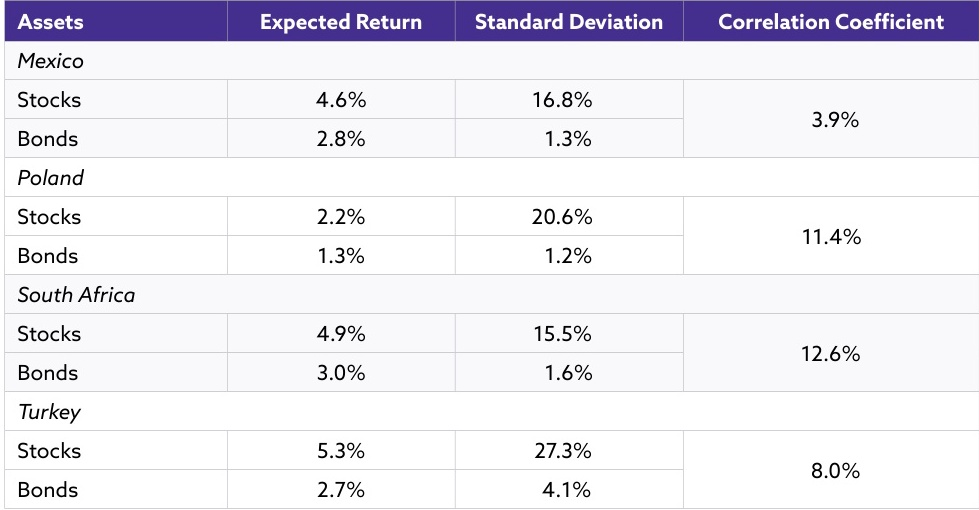

In [60]:
import base64
from IPython.display import Image, display

img_data = base64.b64decode(docs[9].metadata['base64_encodings'][0])  # Decode base64
display(Image(data=img_data))  # Display the image